In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [4]:
def espacios ():
    print("\n"*2)


In [5]:

# Cargamos el archivo de datos
sql_connection = sql.connect('data_01_nuevo.db')
data_01 = pd.read_sql_query("SELECT * FROM data_01_nuevo", sql_connection)
data_01['date'] = pd.to_datetime(data_01['date'])
data_01.set_index('date', inplace=True)


In [6]:


print(data_01.info())
espacios()
print(data_01.describe())
espacios()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

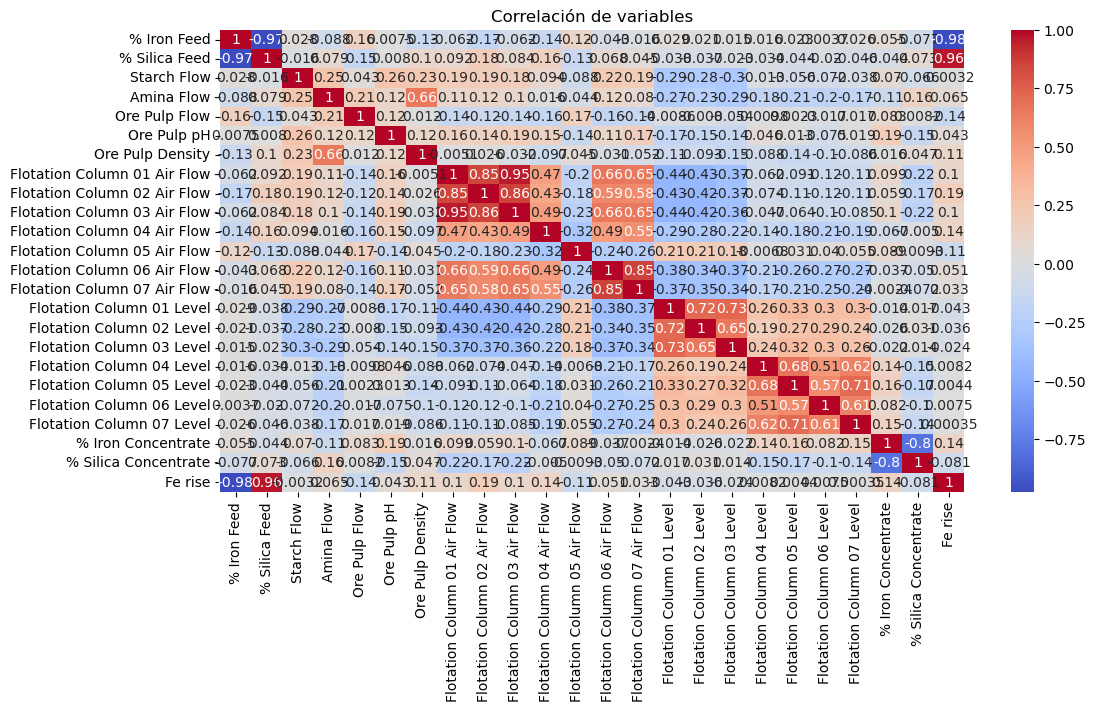

In [7]:

data_01["Fe rise"] = (data_01["% Iron Concentrate"] - data_01["% Iron Feed"])/data_01["% Iron Feed"]
plt.figure(figsize=(12, 6))
sns.heatmap(data_01.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación de variables')
plt.show()


In [9]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=data_01, x='date', y='Fe rise')
# plt.title('Variación de la concentración de hierro')
# plt.show()

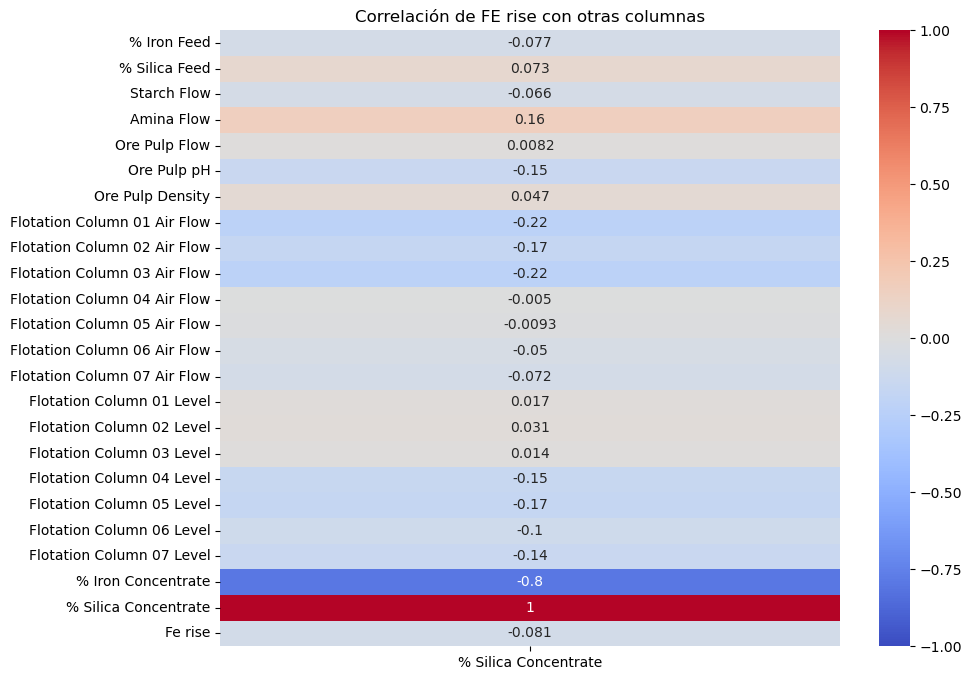

In [10]:
correlation_matrix = data_01.corr()
fe_rise_correlation = correlation_matrix[['% Silica Concentrate']]

# Graficar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(fe_rise_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de FE rise con otras columnas')
plt.show()

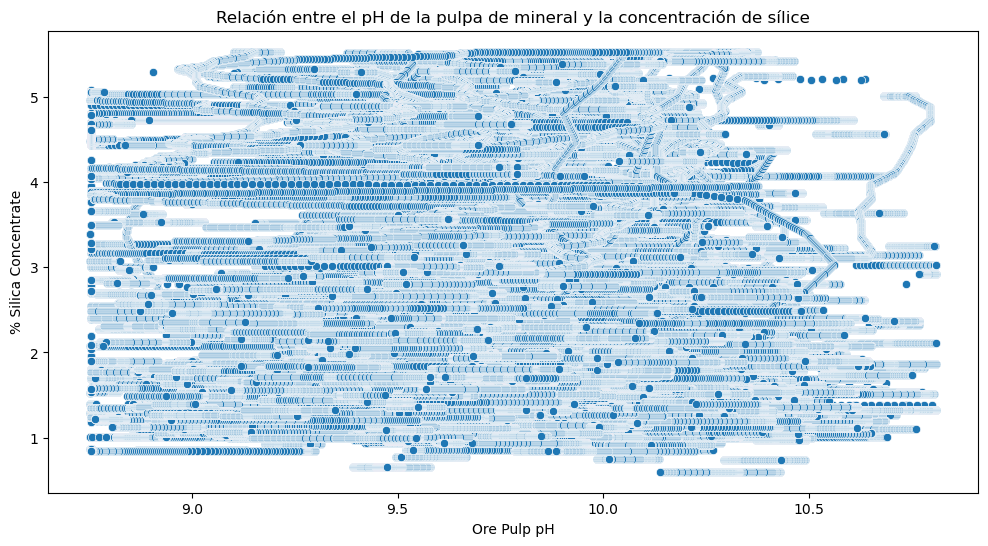

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x='Ore Pulp pH', y='% Silica Concentrate')
plt.title('Relación entre el pH de la pulpa de mineral y la concentración de sílice')
plt.show()

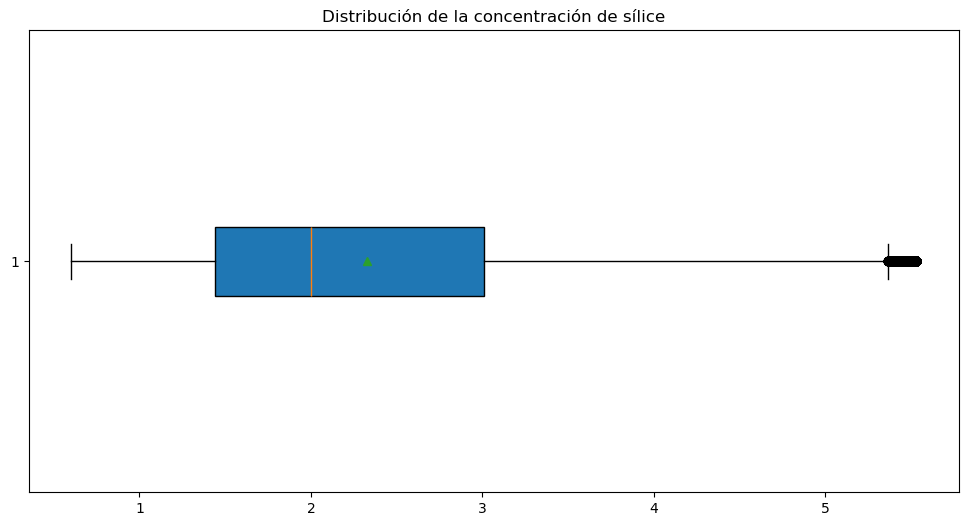

In [14]:
plt.figure(figsize=(12, 6))
plt.boxplot(data_01['% Silica Concentrate'], vert=False, patch_artist=True, showmeans=True)
plt.title('Distribución de la concentración de sílice')
plt.show()

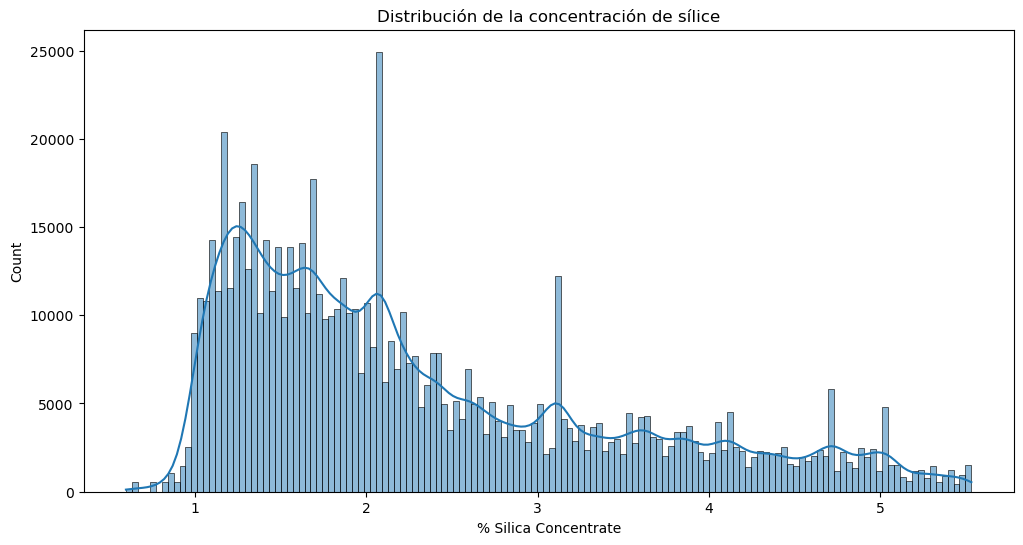

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data_01['% Silica Concentrate'], kde=True)
plt.title('Distribución de la concentración de sílice')
plt.show()